C:\Users\Kingster\AppData\Local\Temp\ipykernel_21156\2686547798.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(dat).show()


ADF test results:  (-0.5741415588727888, 0.8767185818814236, 5, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, -71.51441249383436)


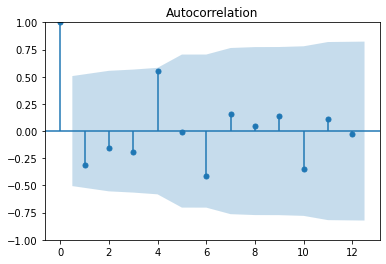

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf

data = pd.read_csv("albedo.csv")
dat = np.diff(data["Albedo"],1)
plot_acf(dat).show()
print("ADF test results: ",ADF(dat))

In [3]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

data = pd.read_csv("albedo.csv")

bic_matrix = []
for p in range(2):
    temp = []
    for q in range(2):
        try:
            temp.append(ARIMA(data["Albedo"],order=(p,0,q)).fit().bic)
        except:
            temp.append(None)
    bic_matrix.append(temp)

print(bic_matrix)

C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[[-85.57607304788223, -95.66208408932582], [-103.60787978113777, -100.95677668603567]]


C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                 Albedo   No. Observations:                   17
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  52.325
Date:                Sun, 13 Nov 2022   AIC                           -100.650
Time:                        16:41:32   BIC                            -99.105
Sample:                             0   HQIC                          -100.571
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0040      0.243     -0.017      0.987      -0.480       0.472
sigma2      8.448e-05   3.66e-05      2.309      0.021    1.28e-05       0.000
Ljung-Box (L1) (Q):                   0.01   Jarque-

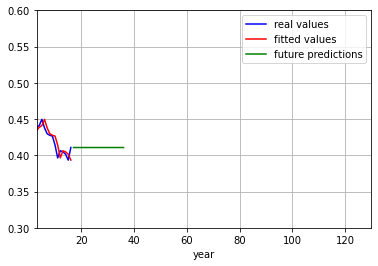

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv("albedo.csv")

model = ARIMA(data["Albedo"],order=(1,1,0)).fit()
print(model.summary())

fig = plt.figure()
fig.set_facecolor("white")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(data["Albedo"],color="blue",label="real values")
ax.plot(model.fittedvalues, color="red",label="fitted values")
ax.plot(model.forecast(20),color="green",label="future predictions")
plt.xlim([3,130])
plt.ylim([0.3,0.6])
plt.xlabel("year")
plt.ylabel("")
plt.legend(loc="best")
print(model.forecast(7))